Dataset background: The dataset contains employee's positions, levels and salaries.

Goal: Predict salary amount given a specific level.

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Feature Scaling

SVR is a less common class. It does not take care of feature scaling. I don't split dataset because the sample size is not large enough.

In [4]:
from sklearn.preprocessing import StandardScaler

Create two separate objects using StandardScaler class:

sc_X

sc_y

In [5]:
sc_X = StandardScaler()
sc_y = StandardScaler()

Scale the independent and dependent matrices by fit_transform method

In [6]:
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(warning is just type conversion, can be ignored)

# Fit SVR to the dataset

In [7]:
from sklearn.svm import SVR

Specify kernal of the regressor to be Guassion since a non-linear model will be applied

In [8]:
regressor = SVR(kernel = 'rbf')

Fit regressor to our dataset

In [9]:
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Prediction

In [10]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([ 170370.0204065])

Given an employ with level of 6.5, the prediction salary is $170,370.

# Visualisation

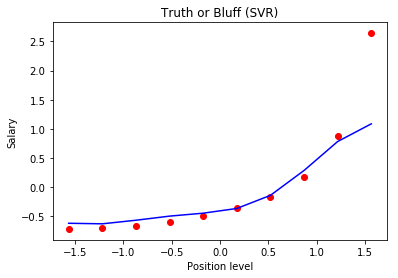

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The last datapoint represents CEO who has an extremely high salary. It's an outlier and quite far away from other observation points.

Visualise the SVR results for a higher resolution or a smoother curve

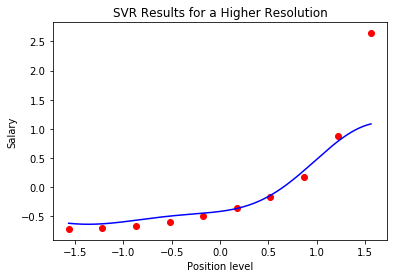

In [12]:
X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR Results for a Higher Resolution')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

I chooee a step size of 0.01 instead of 0.1 because the data is feature scaled.